In [4]:
import os
import sys
import re
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

r = re.compile(r"Batch (\d+), prob = ([^\s]+)")


In [5]:
def _get_log_extension():
    return '.stderr'

In [6]:
def parse_log(log_file):
    probs = []

    with open(log_file) as f:
        last_class = None

        for l in f.readlines():
            matches = r.search(l)

            if matches:
                batch = int(matches.groups()[0])

                if last_class != batch:
                    last_class = batch
                    probs.append([])

                probs[last_class].append(float(matches.groups()[1]))

    # row x col = alignments x probabilities
    return np.asarray(probs)


In [1]:
input_folder = '/Users/covix/Projects/probable-joke/C3D-v1.1/examples/asl_paper/TEST/probability-extractor'
threshold = 0.9

In [2]:
log_files = sorted([i for i in os.listdir(
        input_folder) if i.endswith(_get_log_extension())])

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

NameError: name 'os' is not defined

Parsing: OAR.test_1_aligned_aligned_03-M-04-D-comp.5646199.stderr
	Index: 3
	Class: 4
Probability: 0.978883

Parsing: OAR.test_1_aligned_aligned_06-M-04-C-comp.5646200.stderr
	Index: 8
	Class: 9
Probability: 0.999904

Parsing: OAR.test_1_aligned_aligned_06-M-04-D-comp.5646201.stderr
	Index: 8
	Class: 9
Probability: 0.999967

Parsing: OAR.test_1_aligned_aligned_07-M-04-D-comp.5646202.stderr
	Index: 3
	Class: 4
Probability: 0.992498

Parsing: OAR.test_1_aligned_aligned_11-M-04-C-comp.5646203.stderr
	Index: 8
	Class: 9
Probability: 0.999973

Parsing: OAR.test_1_aligned_aligned_12-M-04-C-comp.5646204.stderr
	Index: 8
	Class: 9
Probability: 0.999966



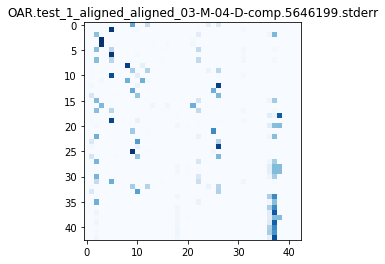

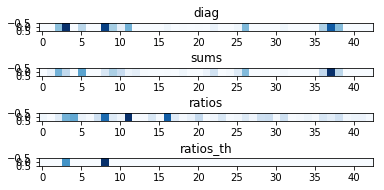

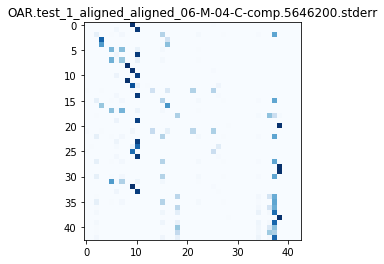

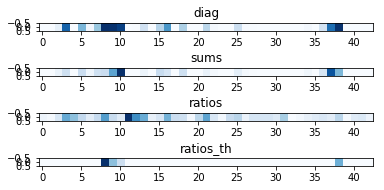

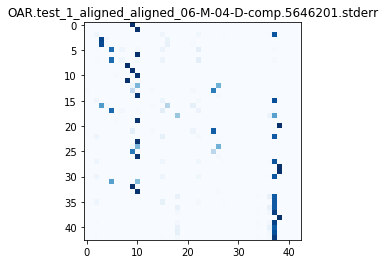

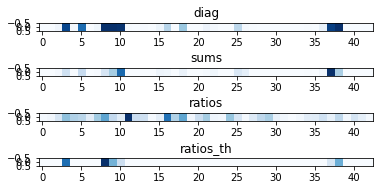

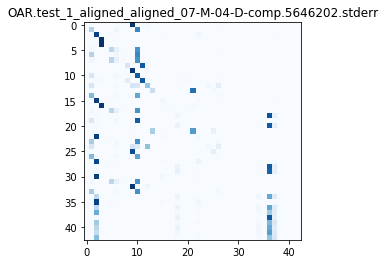

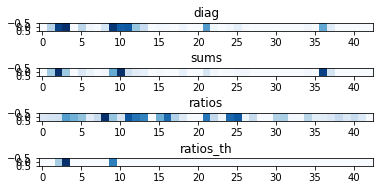

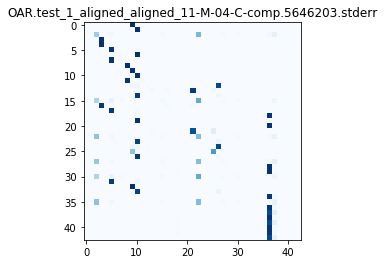

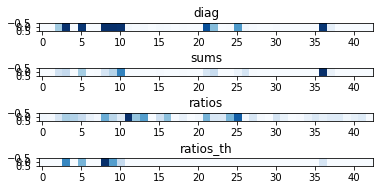

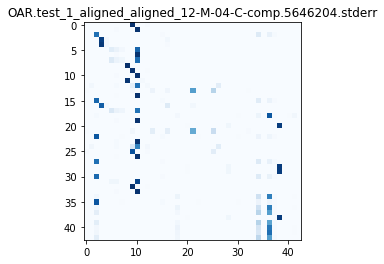

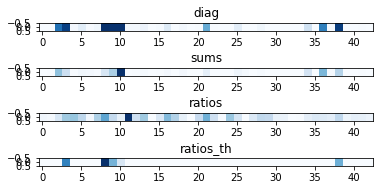

In [121]:
dfs = []
for log_file in log_files:
    print "Parsing:", log_file
    m = parse_log(os.path.join(input_folder, log_file))
    diag = m.diagonal()
    y_pred = np.argmax(diag)

    print '\tIndex:', y_pred
    print '\tClass:', y_pred + 1
    print 'Probability:', diag[y_pred]
    print

    sums = np.apply_along_axis(np.sum, 0, m)
    ratios = diag / sums
    ratios_th = ratios.copy()
    ratios_th[diag < threshold] = 0
    y_pred = np.argmax(ratios_th)

    plt.figure()
    plt.title(log_file)
    plt.imshow(m, interpolation='none', cmap='Blues')

    plt.figure()
    plt.subplot(511)
    plt.title("diag")
    plt.imshow(diag.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(512)
    plt.title("sums")
    plt.imshow(sums.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(513)
    plt.title("ratios")
    plt.imshow(ratios.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(514)
    plt.title("ratios_th")
    plt.imshow(ratios_th.reshape((1, 43)),
               interpolation='none', cmap='Blues')
    
    df = pd.DataFrame(m)
    dfs.append(df)


In [127]:
i = 0
print log_files[i]
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_03-M-04-D-comp.5646199.stderr


In [128]:
i = 1
print log_files[i]
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_06-M-04-C-comp.5646200.stderr


In [129]:
i = 2
print log_files[i]
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_06-M-04-D-comp.5646201.stderr


In [130]:
i = 4
print log_files[i]
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_11-M-04-C-comp.5646203.stderr


In [131]:
i = 5
print log_files[i]
df.round(3).style.background_gradient(cmap, low=0, high=1)

OAR.test_1_aligned_aligned_12-M-04-C-comp.5646204.stderr
